In [1]:
from fastai import *
from fastai.vision import *
import os

In [1]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100%|█████████████████████████████████████▉| 1.15G/1.15G [00:26<00:00, 78.6MB/s]
100%|██████████████████████████████████████| 1.15G/1.15G [00:26<00:00, 47.3MB/s]


In [8]:
!unzip chest-xray-pneumonia.zip

Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray.zip          


In [12]:
!7z x chest_xray.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 1237249419 bytes (1180 MiB)

Extracting archive: chest_xray.zip
 34% 4096 Op            --
Path = chest_xray.zip
Type = zip
Physical Size = 1237249419

      1% 453 - chest_xray/test/PNEUMONIA/person1637_virus_2834.jpe                                                                2% 812 - chest_xray/test/NORMAL/IM-0010-0001.jpe                                                    4% 100          5% 1184 - chest_xray/test/NORMAL/NORMAL2-IM-0030-0001.jp                                                            7% 1494 - chest_xray/train/PNEUMONIA/person97_virus_181.jp                                                              8% 1874 - chest_xray/train/PNEUMONIA/person137_virus_281.jpe                                                   

In [2]:
path = Path('chest_xray')

In [3]:
path.ls()

[PosixPath('chest_xray/models'),
 PosixPath('chest_xray/train'),
 PosixPath('chest_xray/test'),
 PosixPath('chest_xray/val')]

In [37]:
for filename in os.listdir(path):
    for file in os.listdir(path/filename):
        i = 0
        for f in os.listdir(path/filename/file):
            src = path/filename/file/f
            change = file+str(i)+'.jpeg'
            dst = path/filename/change
            os.rename(src,dst)
            #print(src,dst)
            i+=1

In [41]:
for filename in os.listdir(path):
    os.rmdir(path/filename/'NORMAL')
    os.rmdir(path/filename/'PNEUMONIA')

In [21]:
get_transforms()

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'scale': (1.0, 1.1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is

In [8]:
a = get_transforms()[0]
cf = get_transforms()[1]
a,cf

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'scale': (1.0, 1.1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is

In [9]:
op_tf = []
op_tf.append(a[0])
#op_tf.append(a[4])
#op_tf.append(a[5])
#op_tf.append(a[6])
op_tf

[RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True)]

In [10]:
trf = (op_tf, cf)

In [50]:
s = 'PNEUMONIA89'
t = 'NORMAL'

In [53]:
print(t[:6])
print(s[:9])

NORMAL
PNEUMONIA


In [4]:
def label_func(name):
    # name = path
    a = str(name).split('/')[-1]
    oi = a.split('.')[0]
    #print(a)
    #print(oi[0])
    if oi[0] == 'P':
        return oi[:9]
    else:
        return oi[:6]
    

In [19]:
data_lm = (ImageItemList.from_folder(path)
          .filter_by_folder(include=['train','test','val'])
          .split_by_folder(valid='val')
          .label_from_func(func=label_func)
          .transform(trf, size=224)
          .databunch())

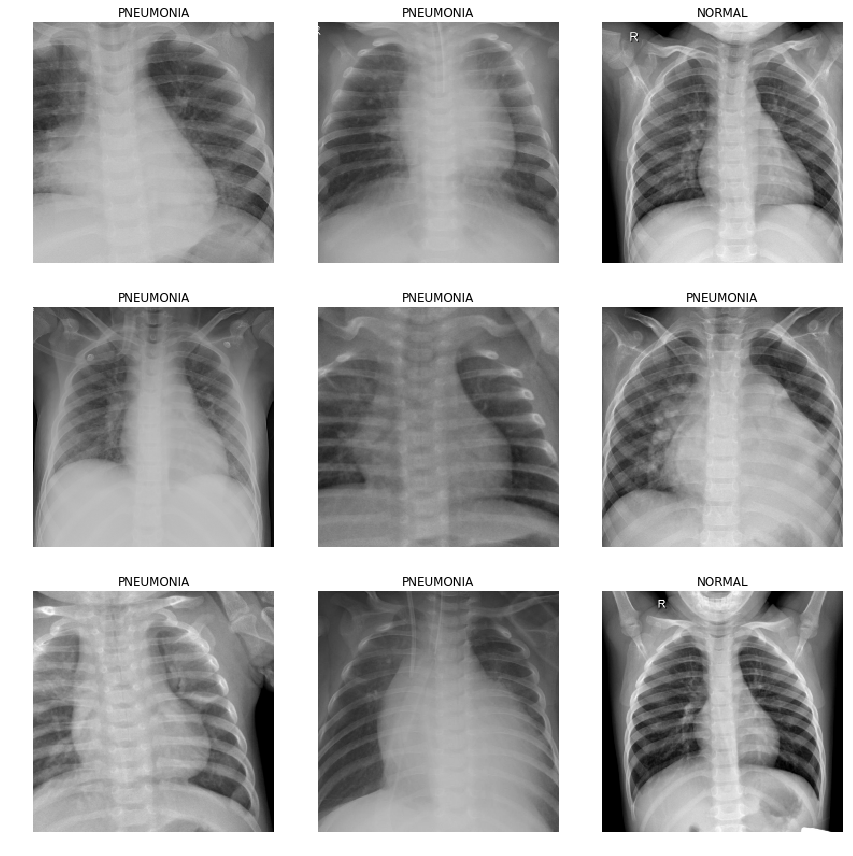

In [20]:
data_lm.show_batch(rows=3)

In [21]:
data_lm.classes

['NORMAL', 'PNEUMONIA']

In [22]:
learn  = create_cnn(data_lm, models.resnet34, metrics=accuracy)

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


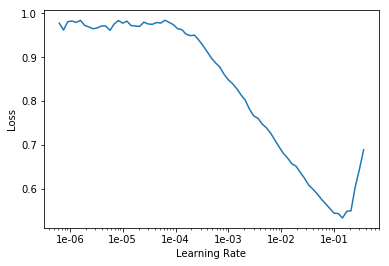

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(5, slice(1e-06,1e-04))

epoch,train_loss,valid_loss,accuracy
1,0.776765,0.362030,0.866667
2,0.490675,0.362054,0.733333
3,0.368663,0.347555,0.733333
4,0.293901,0.362032,0.733333
5,0.271720,0.374680,0.733333


In [18]:
learn.save('first')

In [11]:
learn.load('first');